In [36]:
from handle_single_working import HandleSingleWorking
import os
import pandas as pd
from figure_plot import base_plot
import pandas as pd
%matplotlib inline

# 1. 文件目录处理

In [37]:
path = r'C:\Users\lijunjie3\OneDrive\工作电脑文件\IVET 数据处理\2MEB_UAES_Base_plus_ASC'

In [38]:
res = list()
sub_dirs = list(os.walk(path))[0][1]  # 
print(sub_dirs)

['IVET1', 'IVET2', 'Std']


In [39]:
res = dict()
for sub_dir in sub_dirs:
    sub_path = os.path.join(path, sub_dir)
    res[sub_dir] = HandleSingleWorking(sub_path, test_condition='ASC', convert_to_csv=False)  

# 2. 运行数据处理程序

In [40]:
for value in res.values():
    value.run()

# 3. 三相电流值对比

In [41]:
y = list()
marker = ['v', '^', '<']
for index, sub_res in enumerate(res.values()):
    y.append({'data': [sub_res.test.plot_data['SO_N_HM'], sub_res.test.plot_data['average_current']],
   'style': {'linestyle': '-', 'marker': marker[index], 'label': sub_dirs[index]}})

paras = {'x_label': "Speed [rpm]",
             'y_label': "Three-phase current RMS average [A]",
             'title': 'ASC three phase current'}

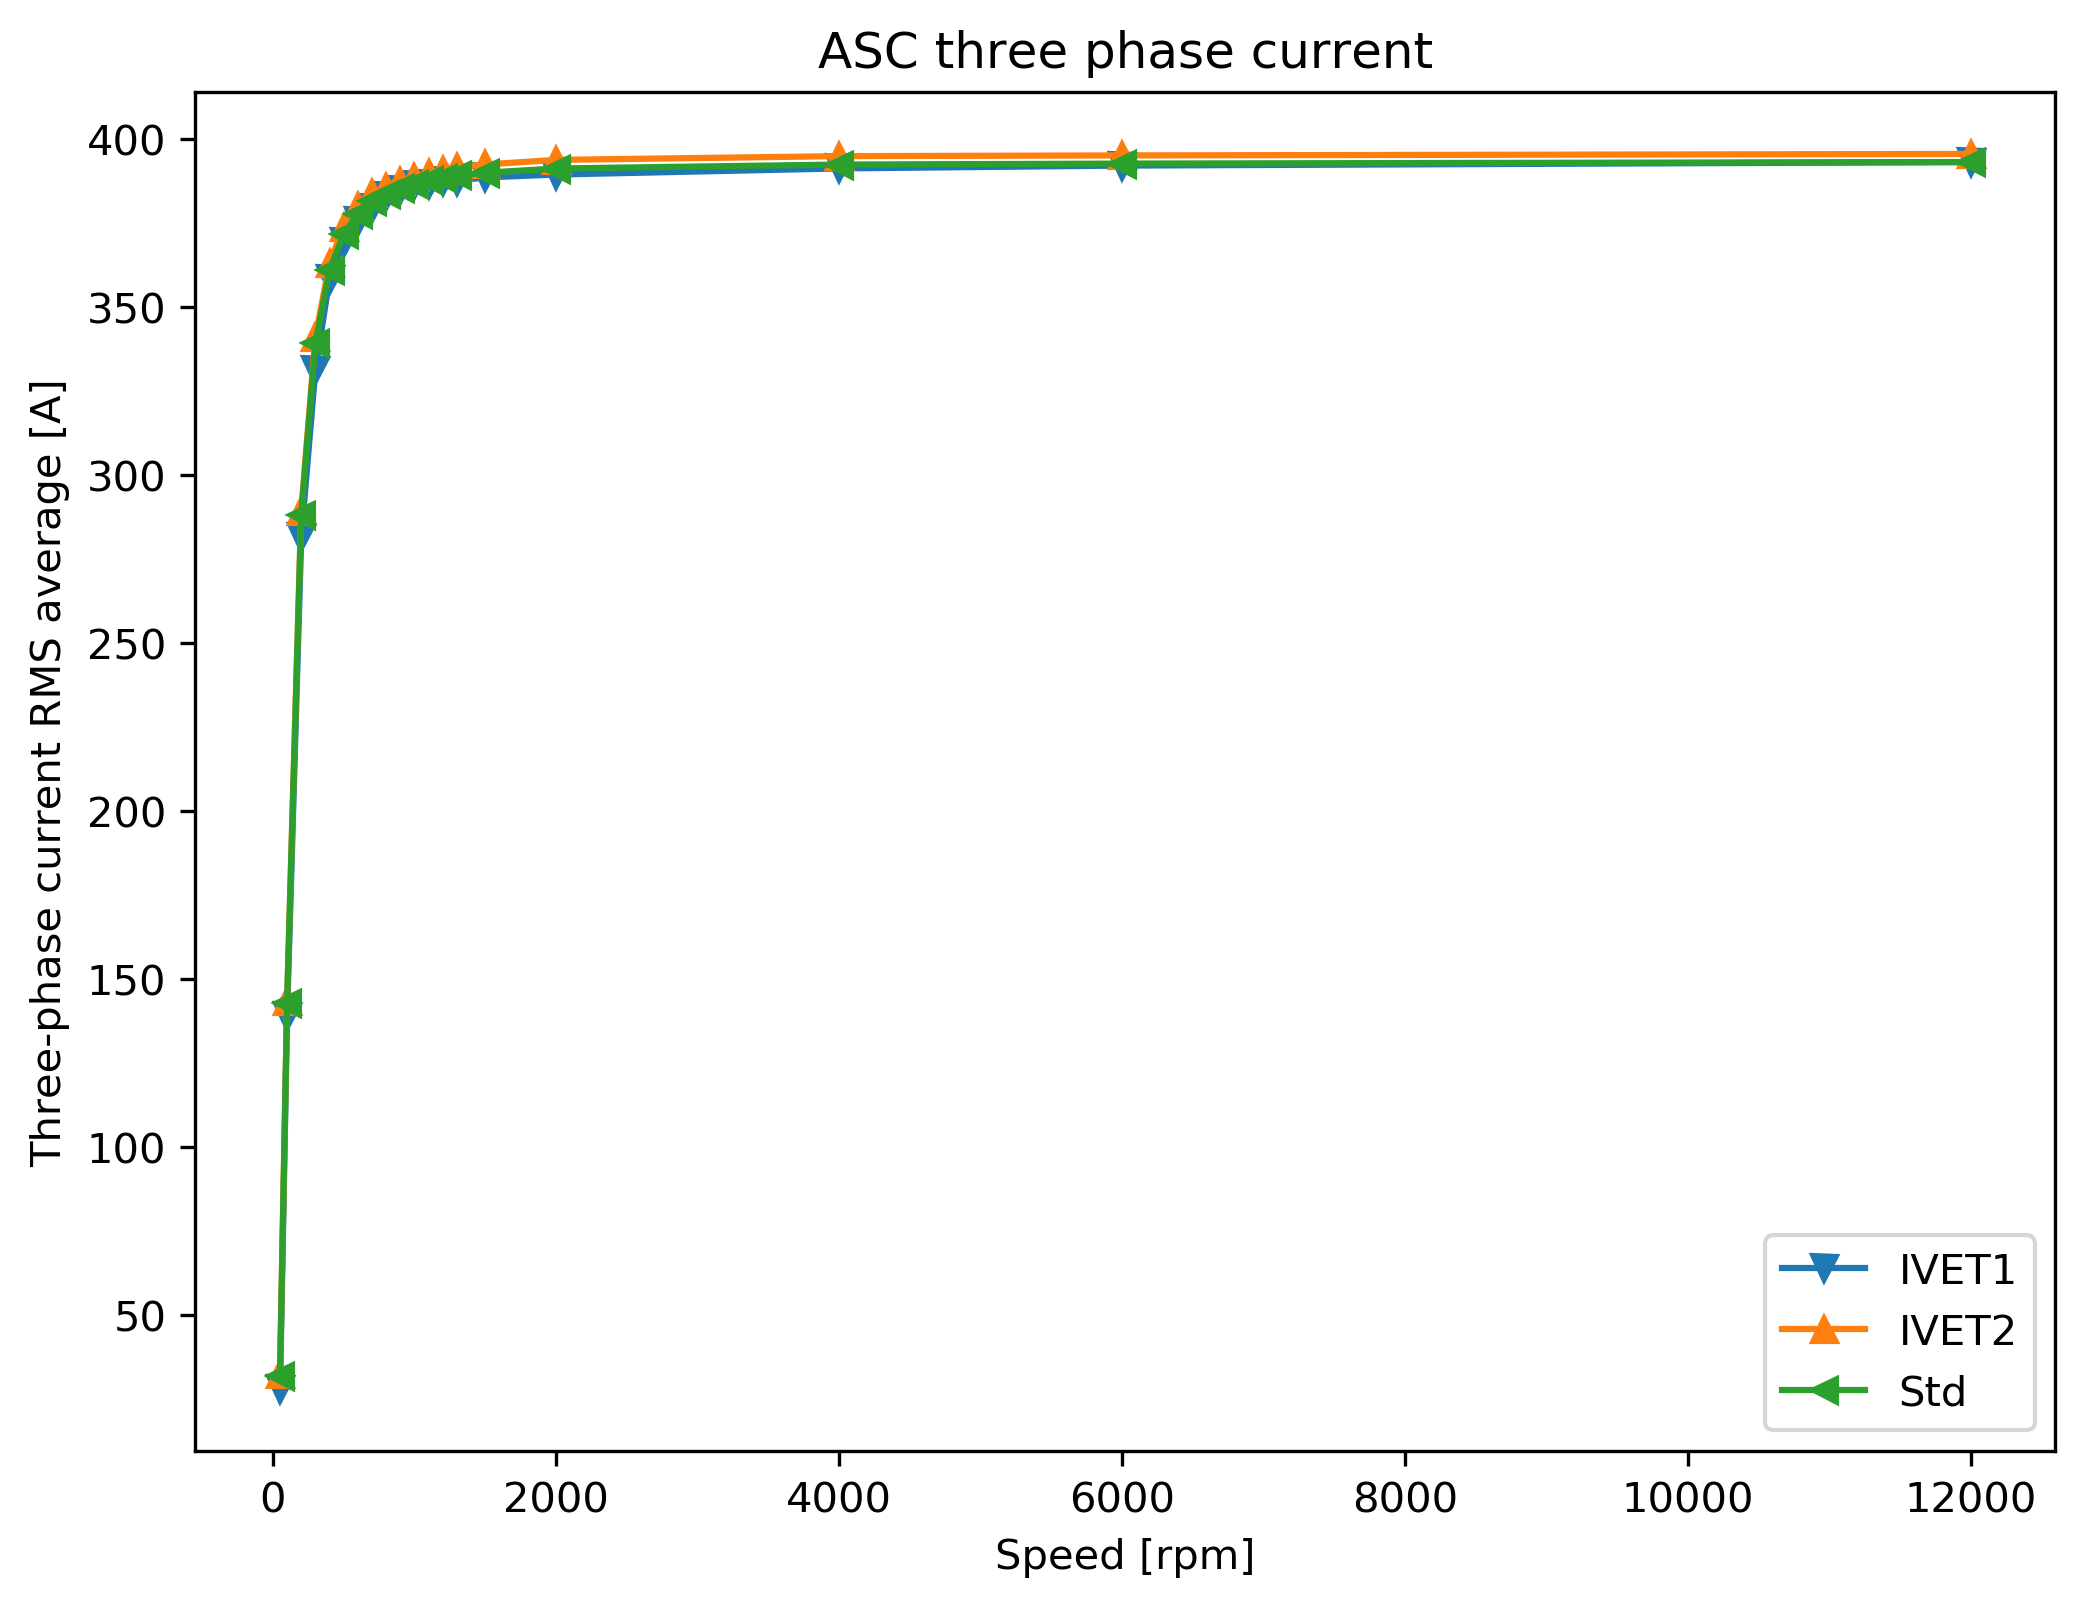

In [42]:
fig = base_plot(y, paras)

# 4. 转矩值对比

In [43]:
y = list()
marker = ['v', '^', '<']
for index, sub_res in enumerate(res.values()):
    y.append({'data': [sub_res.test.plot_data['SO_N_HM'], sub_res.test.plot_data['M_HMmess']],
   'style': {'linestyle': '-', 'marker': marker[index], 'label': sub_dirs[index]}})

paras = {'x_label': "Speed [rpm]",
             'y_label': "Torque [Nm]",
             'title': 'ASC torque'}

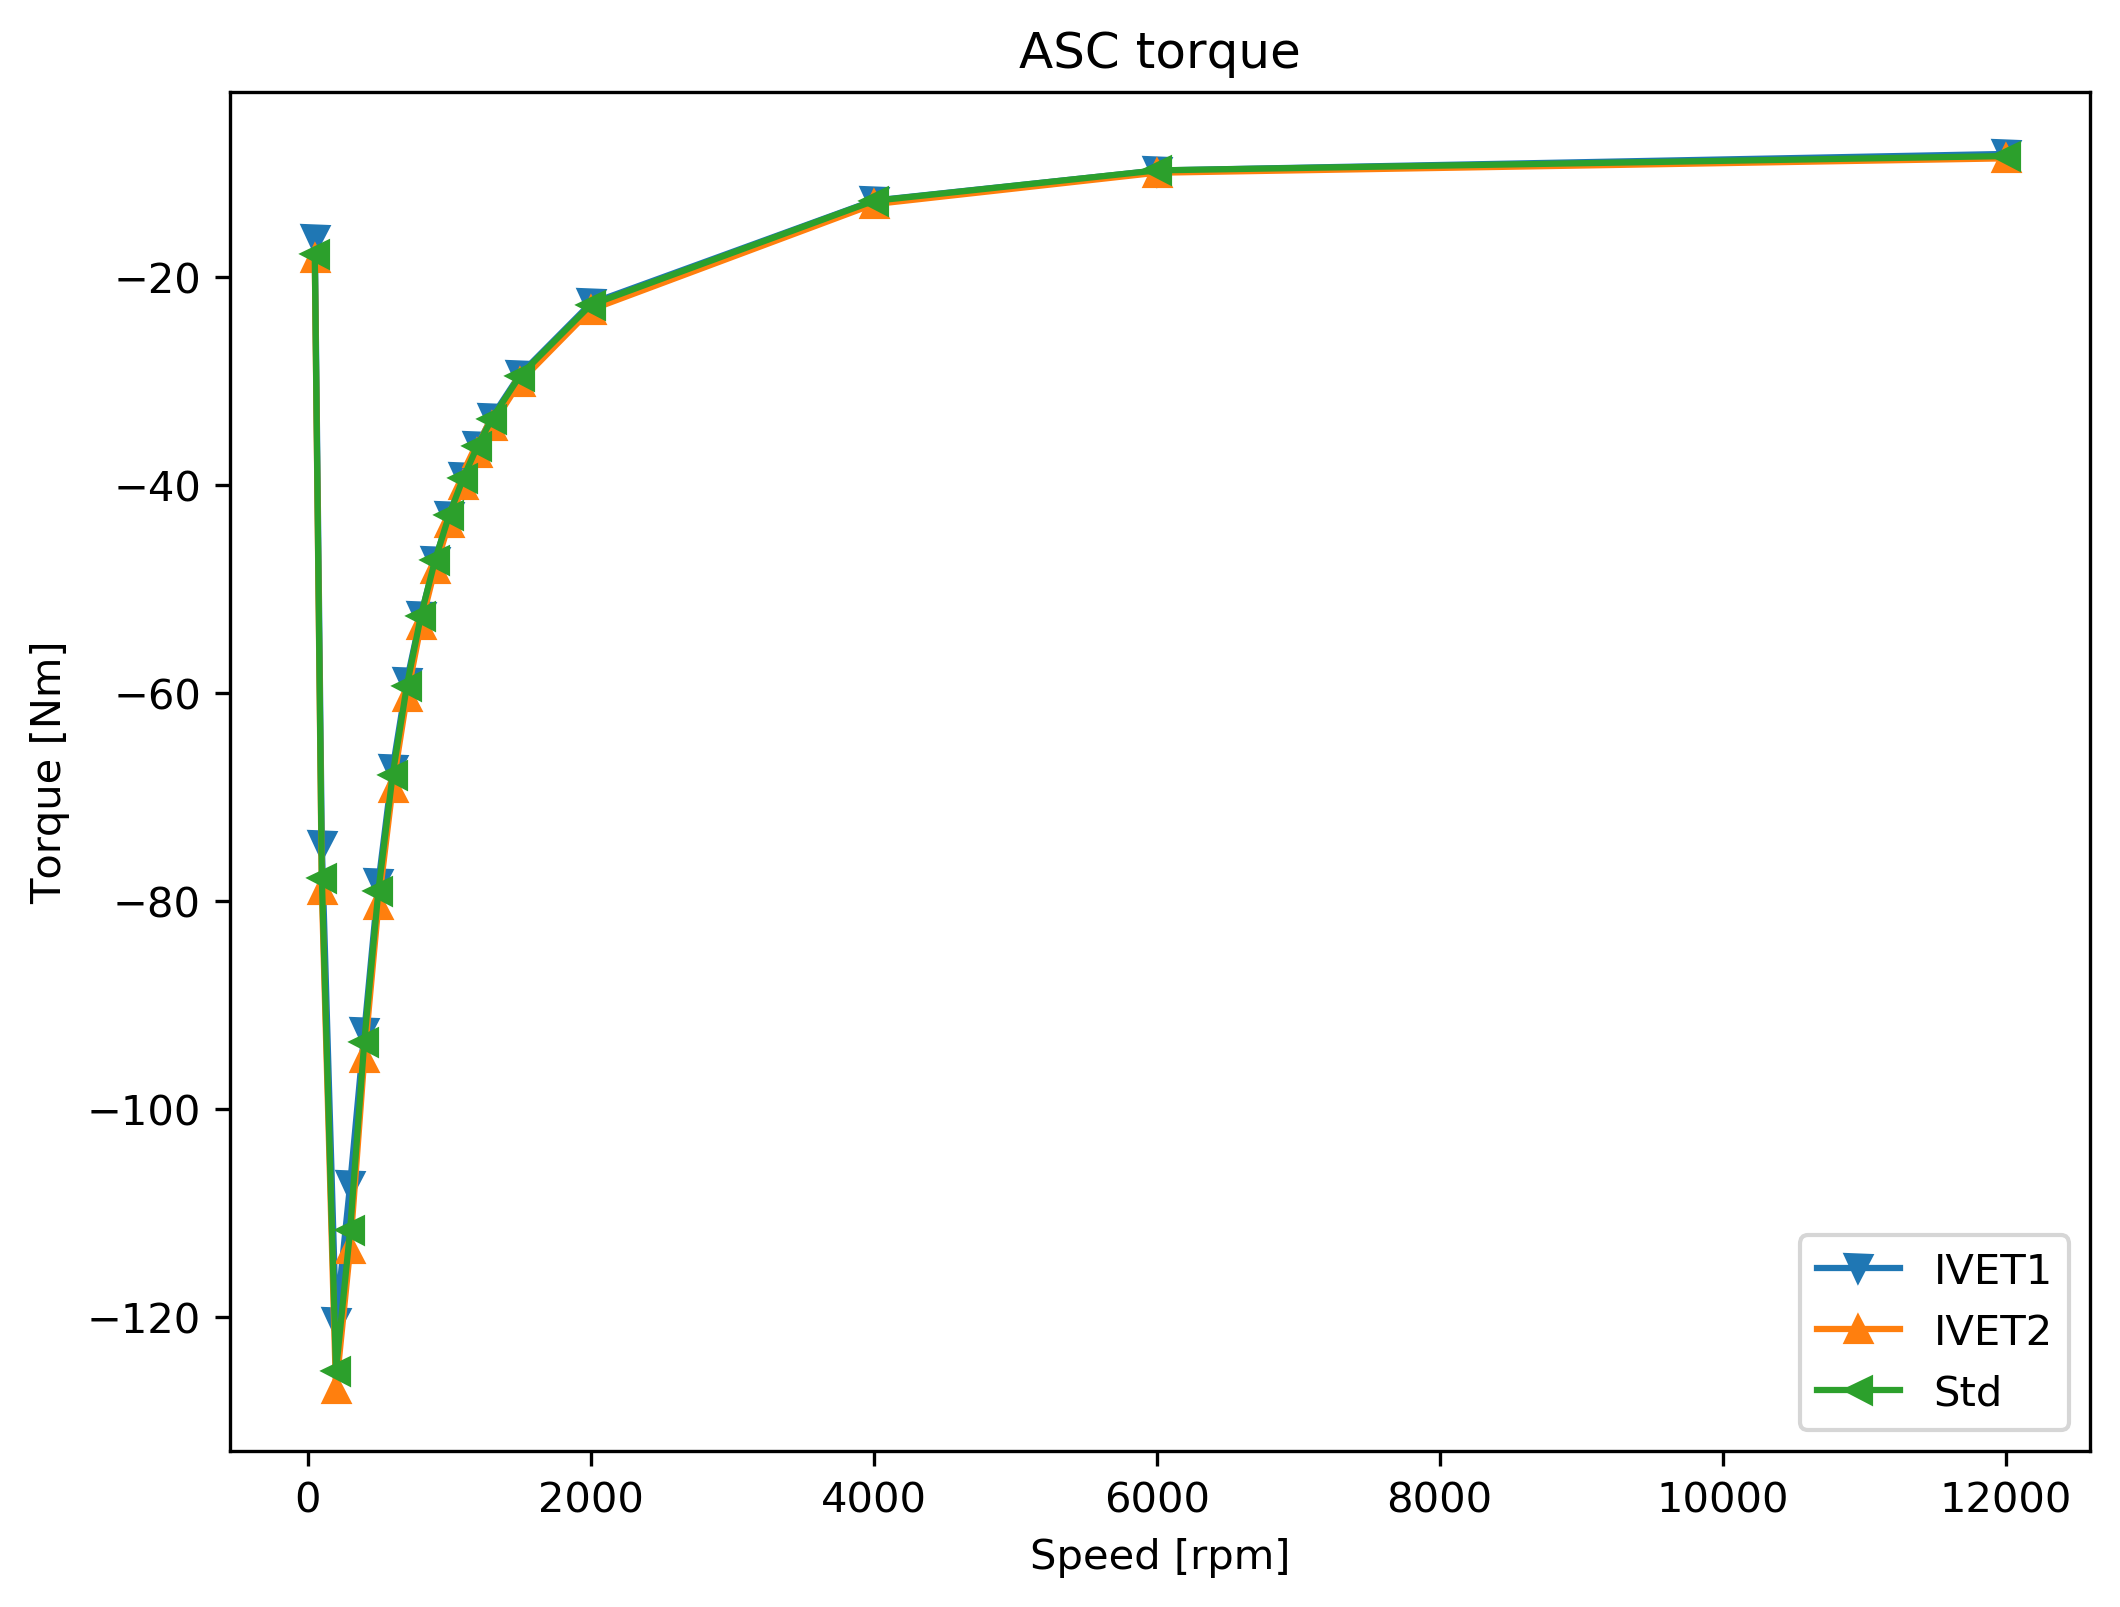

In [44]:
fig = base_plot(y, paras)

# 5 获取对比的数据

In [45]:
for sub_res in res.values():
    try:
        sub_res.test.plot_data = sub_res.test.plot_data.set_index('SO_N_HM')
    except:
        sub_res.test.plot_data = sub_res.test.plot_data.set_index('SO_N_HM [1/min]')

In [51]:
current_data = pd.DataFrame()

for index, sub_res in enumerate(res.values()):
    current_data[sub_dirs[index]] = sub_res.test.plot_data['average_current']


round(current_data[['Std', 'IVET1', 'IVET2']], 2)

,Std,IVET1,IVET2
SO_N_HM,,,
50.0,31.79,27.86,32.50
100.0,142.74,139.12,143.60
200.0,288.10,281.58,289.36
300.0,339.26,331.40,341.04
400.0,360.98,358.47,363.06
500.0,371.78,369.46,374.00
600.0,377.82,375.67,380.14
700.0,381.55,379.58,383.93
800.0,383.57,383.06,385.71


In [52]:
torque_data = pd.DataFrame()

for index, sub_res in enumerate(res.values()):
    try:
        torque_data[sub_dirs[index]] = sub_res.test.plot_data['M_HMmess']
    except:
        torque_data[sub_dirs[index]] = sub_res.test.plot_data['M_HMmess [Nm]']
            
round(torque_data[['Std', 'IVET1', 'IVET2']], 2)

,Std,IVET1,IVET2
SO_N_HM,,,
50.0,-17.79,-16.30,-18.14
100.0,-77.73,-74.61,-78.92
200.0,-125.16,-120.47,-126.91
300.0,-111.61,-107.23,-113.37
400.0,-93.49,-92.59,-95.08
500.0,-78.96,-78.21,-80.33
600.0,-67.87,-67.28,-69.07
700.0,-59.34,-58.87,-60.40
800.0,-52.56,-52.56,-53.45


In [53]:
import matplotlib.pyplot as plt